In [1]:
import json
import glob
reports = []
for file in glob.glob("complaints_fixed.json"):
    for line in open(file, "r"):
        #print(line[179])
        reports.append(json.loads(line))
#reports

In [2]:
type(reports)
import pandas as pd
df = pd.DataFrame(reports)
df

""


In [6]:
r = pd.crosstab(index=df['myCategory'], columns=df['location'])
r

location,"""Bhagyalakshmi Nivasa"", Chikkabidarakallu , Bengaluru","""Jaiganesh"", No 321, 1st floor, 36th A cross, 7th Main, 5th Block Jayanagar, Near Good Shepherd School","# 1 Manjushree Complex Near Laggere Bridge, Ring Road Bangalore560086, Bengaluru, Karnataka 560058, India","# 10,1st floor, Muthiyalamma Koil K St, near bus stand, Shivaji Nagar","# 11, 1 St A Main 1 St A Cross, Vivekananda Nagar, Srinivasnagar, Banashankari, Bengaluru, Karnataka 560085, India","# 112 8th B cross EWS 1st phase, Volagalahalli, Stage II, Kengeri Satellite Town","# 118, Subbaiah Circle, Lal Bagh Main Rd, Raja Ram Mohanroy Extension, Sudhama Nagar, Bengaluru, Karnataka 560027, India","# 119, 5th Cross, BG Road, Arekere , Bengaluru","# 12 11th Cross, 4th Main Rd, Sampangi Rama Nagara","# 1208,5 th main BDA LYT, 11th Block, Anjanapura Village, 1st Phase, FEA",...,"ಹೇರೋಹಳ್ಳಿ ಸುಂಕದಕಟ್ಟೆ, null , ಸುಂಕದಕಟ್ಟೆ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, Bellandur, Bengaluru, Karnataka 560103, India","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ಚಂದ್ರ ಲೇಔಟ್ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ನಾಯಂಡಹಳ್ಳಿ , ಬೆಂಗಳೂರು","ಹೊರ ವರ್ತುಲ ರಸ್ತೆ, ಹೊರ ವರ್ತುಲ ರಸ್ತೆ , ಯಶವಂತಪುರ , ಬೆಂಗಳೂರು","ಹೊರಮಾವು, null , ಕಲ್ಯಾಣ್ ನಗರ , ಬೆಂಗಳೂರು","ಹೊಸಹಳ್ಳಿ (ಟೂವರ್ಡ್ಸ್ ನೆರಿಗೆ), null , ಬೆಂಗಳೂರು","೩೯/೧, Sannidi Rd, NR Colony, Basavanagudi","‌jinke Park, Nanjamba Agrahara, Kempegowda Nagar, Bengaluru, Karnataka, India","🎭 Abhinaya Taranga 🎭, Srinivasanagara, Hanumanthnagar, Banashankari Stage I, Banashankari, Bengaluru, Karnataka, India"
myCategory,,,,,,,,,,,,,,,,,,,,,
Air Pollution,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autorickshaws Meter Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beautification/Maintenance Of Medians Or Circles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Birth or death certificate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Build Garbage/Waste Composting Units,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Water Meter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
c = df.groupby('myCategory').agg({'count'})
c

,id,description,location,image_url,postedOn,category,subCategory,page
,count,count,count,count,count,count,count,count
myCategory,,,,,,,,
Air Pollution,277,277,277,277,277,277,277,277
Autorickshaws Meter Issues,11,11,11,11,11,11,11,11
Beautification/Maintenance Of Medians Or Circles,3,3,3,3,3,3,3,3
Birth or death certificate,1,1,1,1,1,1,1,1
Build Garbage/Waste Composting Units,18,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,8,8,8,8,8,8,8,8
Violation of Quarantine during Covid-19,1,1,1,1,1,1,1,1


In [18]:
cc = c.iloc[:,0:1]
cc

,id
,count
myCategory,
Air Pollution,277
Autorickshaws Meter Issues,11
Beautification/Maintenance Of Medians Or Circles,3
Birth or death certificate,1
Build Garbage/Waste Composting Units,18
...,...
Violation of Lockdown during Covid-19,8
Violation of Quarantine during Covid-19,1


In [21]:
cc.reset_index(level=0, inplace=True)

In [24]:
cc.columns = ['myCategory', 'count']
cc

,myCategory,count
0,Air Pollution,277
1,Autorickshaws Meter Issues,11
2,Beautification/Maintenance Of Medians Or Circles,3
3,Birth or death certificate,1
4,Build Garbage/Waste Composting Units,18
...,...,...
161,Violation of Lockdown during Covid-19,8
162,Violation of Quarantine during Covid-19,1
163,Water Meter,1
164,Water Pollution,19


In [25]:
cc.sort_values('count', ascending=False)

,myCategory,count
37,Fixing/Reparing Potholes,10185
90,Maintenance/Repair Of Streetlights,6744
9,Clearance Of Garbage Dump Or Black Spot,5151
132,Repair of Existing Footpaths,3464
77,Maintenance Of Dry Waste Collection Centre,2638
...,...,...
139,Request for Fogging/Sanitation during Covid-19,1
72,Maintain regular water supply,1
42,Garbage dump,1
68,KSRTC - Others,1


In [27]:
type(df['postedOn'][0])

str

In [29]:
df['month'] = df['postedOn'].str[:7]

In [53]:
cm = pd.crosstab(index=df['myCategory'], columns=df['month'])
#cm = cm.T
cm

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
myCategory,,,,,,,,,,,,,
Air Pollution,130,20,5,5,37,69,3,0,1,0,1,3,3
Autorickshaws Meter Issues,4,0,0,2,1,1,2,1,0,0,0,0,0
Beautification/Maintenance Of Medians Or Circles,1,0,0,0,1,1,0,0,0,0,0,0,0
Birth or death certificate,1,0,0,0,0,0,0,0,0,0,0,0,0
Build Garbage/Waste Composting Units,6,0,4,1,1,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,2,4,2,0,0,0
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,1,0,0,0,0,0
Water Meter,0,0,0,0,0,0,0,0,0,1,0,0,0


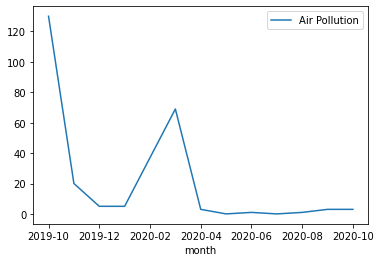

In [55]:
#cm.iloc[0].plot(legend=True)
cm.iloc[0].plot(legend=True)

#plt.show()

In [60]:
cm['Total'] = cm.sum(axis=1)
cm

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,Total
myCategory,,,,,,,,,,,,,,
Air Pollution,130,20,5,5,37,69,3,0,1,0,1,3,3,277
Autorickshaws Meter Issues,4,0,0,2,1,1,2,1,0,0,0,0,0,11
Beautification/Maintenance Of Medians Or Circles,1,0,0,0,1,1,0,0,0,0,0,0,0,3
Birth or death certificate,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Build Garbage/Waste Composting Units,6,0,4,1,1,0,1,1,1,1,0,0,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Violation of Lockdown during Covid-19,0,0,0,0,0,0,0,2,4,2,0,0,0,8
Violation of Quarantine during Covid-19,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Water Meter,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [67]:
cms = cm.sort_values('Total', ascending=False)
cms10 = cms.iloc[0:10,:]
cms10 = cms10.drop('Total', 1)
cms10

month,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10
myCategory,,,,,,,,,,,,,
Fixing/Reparing Potholes,5289,2069,1000,672,720,244,36,10,25,28,31,51,10
Maintenance/Repair Of Streetlights,2642,781,698,1003,1146,249,53,21,43,32,17,44,15
Clearance Of Garbage Dump Or Black Spot,2591,587,413,329,440,306,168,54,89,48,48,65,13
Repair of Existing Footpaths,1935,528,310,260,310,110,7,0,0,1,0,2,1
Maintenance Of Dry Waste Collection Centre,1264,537,312,225,239,61,0,0,0,0,0,0,0
Stray Dog Sterilisation/Animal Birth Control (ABC),1020,235,252,242,148,75,3,7,3,13,4,15,5
Garbage Dumping In Vacant Lot/Land,886,221,125,85,114,54,5,1,4,0,2,11,4
Provide good driveable Roads,732,130,102,60,108,64,22,3,8,8,9,36,5
Desilting of storm water drains,631,170,114,151,133,32,1,1,0,1,0,2,0


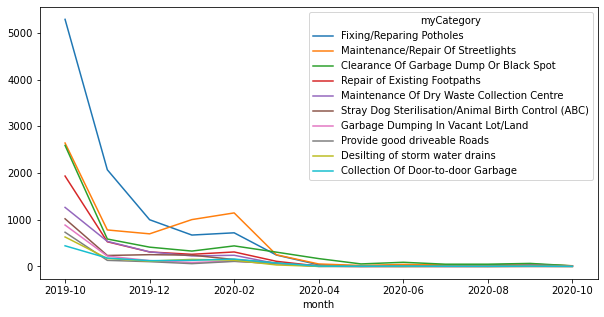

In [76]:
#from matplotlib import pyplot as plt
#plt.figure(figsize=(10,10))
ax = cms10.T.plot(figsize=(10,5)).get_figure()
#ax.set_ylabel("# of complaints")
ax.savefig('test.png')


In [52]:
#cm.columns.values
type(cm.iloc[0,0])
cm.iloc[0]

myCategory
Air Pollution                                       130
Autorickshaws Meter Issues                            4
Beautification/Maintenance Of Medians Or Circles      1
Birth or death certificate                            1
Build Garbage/Waste Composting Units                  6
                                                   ... 
Violation of Lockdown during Covid-19                 0
Violation of Quarantine during Covid-19               0
Water Meter                                           0
Water Pollution                                       9
Wrong Parking                                        32
Name: 2019-10, Length: 166, dtype: int64